  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

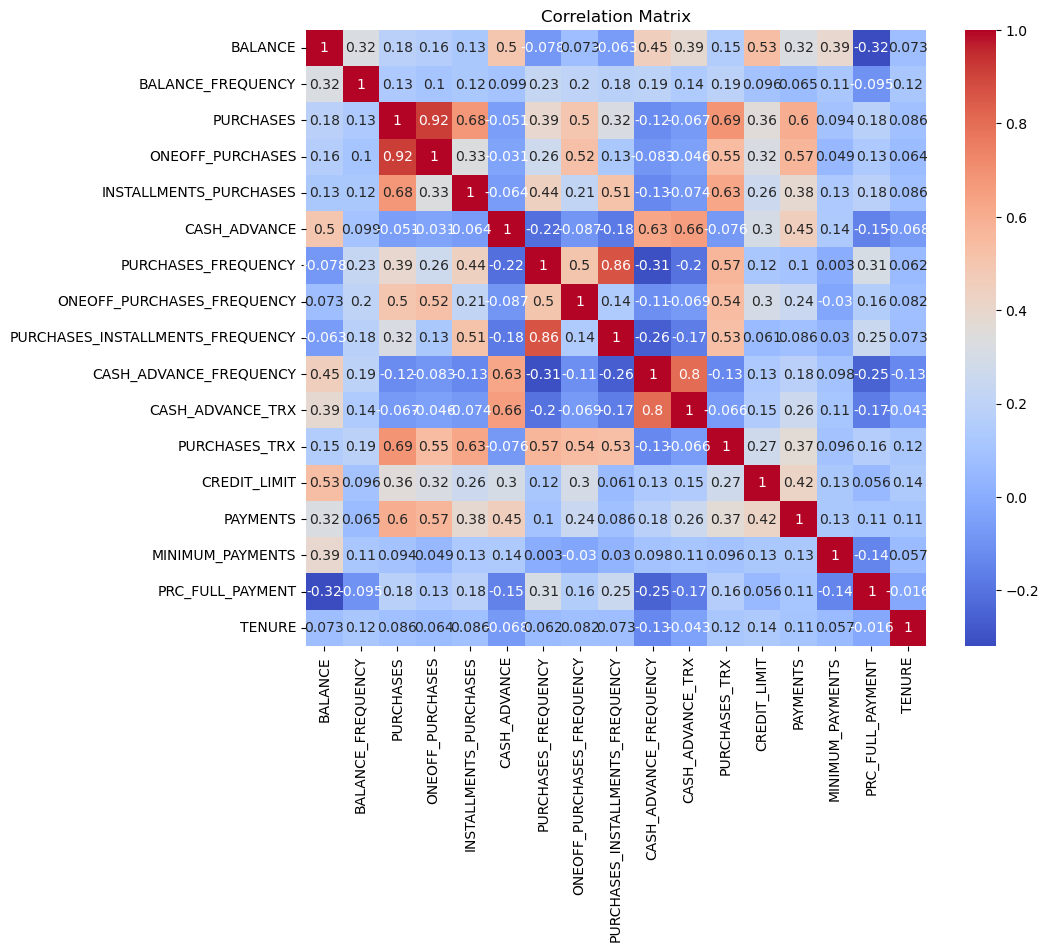

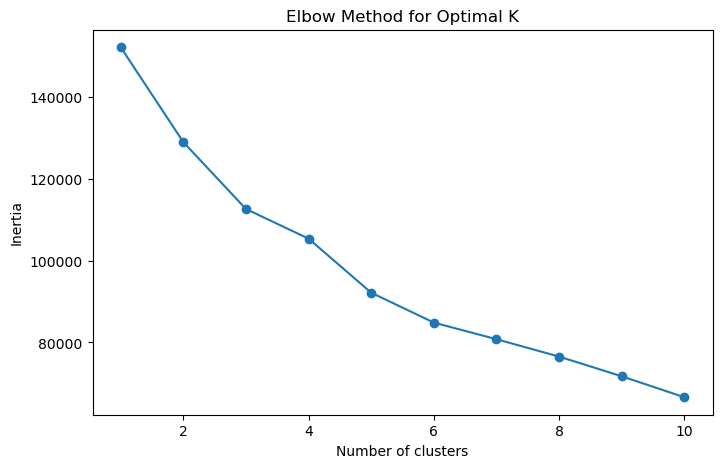

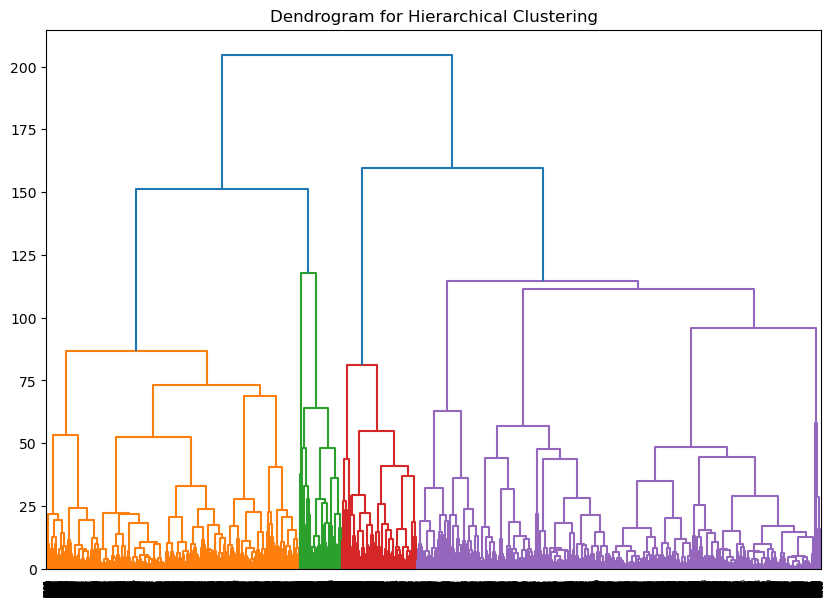

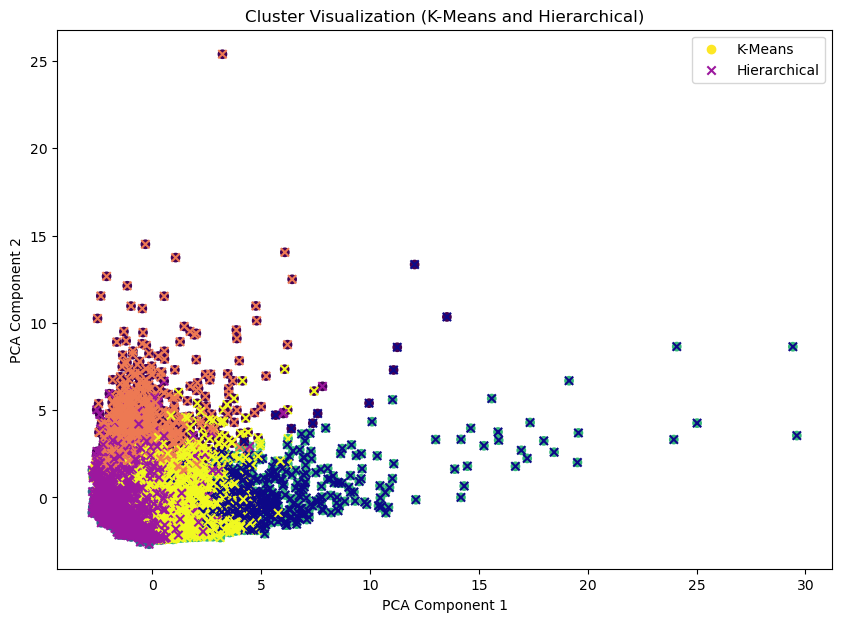

                    BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                                  
0               5023.958508           0.967107   721.184928        453.485000   
1                109.464707           0.412883   351.589913        191.487250   
2               1253.422099           0.974766  2181.418772       1241.370362   
3               1500.348531           0.966640   282.216074        209.226223   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                           267.804742   5075.737329             0.329511   
1                           160.571811    299.684391             0.320703   
2                           940.311888    234.489319             0.928436   
3                            73.305481    789.088912             0.206247   

                ONEOFF_PURCHASES_FREQUENCY  PURCHA

In [18]:
# 1. Load and Explore the Data
import pandas as pd
import seaborn as sns 

# Load the dataset
data = pd.read_csv('CC GENERAL.csv')

# Preview the first few rows
print(data.head())
import pandas as pd


# Step 1: Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 2: Drop or encode non-numeric columns
# If these are identifiers (e.g., 'CustomerID'), drop them
data = data.drop(columns=non_numeric_columns)

# Step 3: Fill any remaining missing values if necessary
data.fillna(data.mean(), inplace=True)

# Step 4: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Now you can proceed with clustering (K-Means, Hierarchical Clustering, etc.)

# Check for general information and summary statistics
print(data.info())
print(data.describe())

# 2. Handling Missing Values
# Check for missing values
print(data.isnull().sum())

# Option 1: Drop missing values
data.dropna(inplace=True)

# Option 2: Fill missing values with the mean
data.fillna(data.mean(), inplace=True)

# 3. Standardize the Data
from sklearn.preprocessing import StandardScaler

# Standardize the data (excluding any non-numeric columns if needed)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 4. Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(data_scaled, columns=data.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Applying K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to determine optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit the K-Means model with optimal clusters (e.g., if the elbow appears at K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# 6. Applying Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

# Fit Hierarchical Clustering with optimal number of clusters (e.g., based on dendrogram)
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(data_scaled)

# 7. Visualizing the Clusters
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['KMeans_Cluster'], cmap='viridis', marker='o', label='K-Means')
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Hierarchical_Cluster'], cmap='plasma', marker='x', label='Hierarchical')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization (K-Means and Hierarchical)')
plt.legend()
plt.show()

# 8. Analyze and Interpret the Clusters
# Mean values of features in each K-Means cluster
print(data.groupby('KMeans_Cluster').mean())

# Mean values of features in each Hierarchical cluster
print(data.groupby('Hierarchical_Cluster').mean())
